<div class="head0">
    <div class="head0__name">
        Equation with zero drift in 1D case
    </div>
    <div class="head0__note">
        Solution of the 1D Fokker-Planck equation with zero drift (and known analytic solution) in standard numpy format.
    </div>
</div>
<div class="note">
    Since interpolation is not required for the case of the zero drift ($f \equiv 0$), but our solver calculates it by design, then it is expected to operate much slower than another simple solvers.
</div>

In [1]:
import sys

import numpy as np

sys.path.extend(['./../lib', './../helpers'])
from solver import Solver
from solvers_check import SolversCheck
from helpers import init_jupyter

data_path = './data/eq-1d_drift-zero_analyt'
init_jupyter()

Start | 11:54AM MSK on Sep 17, 2019 |
-------------------------------------


<div class="head1">
    <div class="head1__name">
        Model problem
    </div>
</div>

Consider
$$
    d x = f(x, t) \, dt + S(x, t) \, d \beta,
    \quad
    d \beta \, d \beta^{\top} = Q(t) dt,
    \quad
    x(0) = x_0 \sim \rho(x, 0) = \rho_0 (x),
$$
$$
    \frac{\partial \rho(x, t)}{\partial t} =
        \sum_{i=1}^d \sum_{j=1}^d
            \frac{\partial^2}{\partial x_i \partial x_j}
            \left[ D_{ij}(x, t) \rho(x, t) \right]
        - \sum_{i=1}^d
            \frac{\partial}{\partial x_i}
            \left[ f_i(x, t) \rho(x, t) \right],
    \quad
     D(x, t) = \frac{1}{2} S(x, t) Q(t) S(x, t)^{\top},
$$
where spatial $d$-dimensional ($d \ge 1$) variable $x \in R^d$ has probability density function (PDF) $\rho(x, t)$, $\beta$ is Brownian motion of dimension $q$ ($q \ge 1$, and we assume below that $q = d$), $f(x, t) \in R^d$ is a vector-function, $S(x, t) \in R^{d \times q}$ and $Q(t) \in R^{q \times q}$ are matrix-functions and $D(x, t) \in R^{d \times d}$ is a diffusion tensor.

Let
$$
    Q(t) \equiv I,
    \,
    S(x, t) \equiv 0.2 I
    \implies
    D(x, t) \equiv 0.02 I,
$$
and
$$
    d = 1,
    \quad
    x \in \Omega,
    \quad
    \rho(x, t) |_{\partial \Omega} \approx 0,
    \quad
    f(x, t) \equiv 0,
    \quad
    \rho_0(x) = \frac{1}{\sqrt{2 \pi s}}\exp{\left[-\frac{x^2}{2s}\right]}.
$$

It can be shown that the analytic solution is
$$
    \rho(x, t) =
        \frac
            {
                1
            }
            {
                \sqrt{2 \pi s + 4 \pi D t}
            }
        \exp{ \left[
            - \frac
                {
                    x^2
                }
                {
                    2  s + 4 D t
                }
        \right] },
$$
and the stationary solution ($t \rightarrow \infty$) is
$$
    \rho_{stat}(x) = 0.
$$

In [2]:
def func_f0(x, t):
    return np.zeros(x.shape)

def func_f1(x, t):
    return np.zeros(x.shape)

def func_r0(x):
    a = 2. * s_coef
    r = np.exp(-x * x / a) / np.sqrt(np.pi * a)
    return r.reshape(-1)

def func_rt(x, t):
    a = 2. * s_coef + 4. * D_coef * t
    r = np.exp(-x * x / a) / np.sqrt(np.pi * a)
    return r.reshape(-1)

def func_rs(x):
    r = np.zeros(x.shape)
    return r.reshape(-1)

<div class="head1">
    <div class="head1__name">
        Parameters
    </div>
</div>

In [3]:
s_coef = 0.1
D_coef = 0.02
t_min, t_max, t_poi = +0., +1., 1000
x_min, x_max, x_poi = -5., +5., 101

<div class="head1">
    <div class="head1__name">
        Calculation process
    </div>
</div>

In [4]:
SL = Solver(d=1)
SL.set_grid_t(t_poi, t_min, t_max, t_hst=10)
SL.set_grid_x(x_poi, x_min, x_max)
SL.set_funcs(func_f0, func_f1, func_r0, func_rt, func_rs)
SL.set_coefs(D_coef)

SL.prep()
SL.calc()
SL.info()

Solve: 100%|█| 999/999 [00:06<00:00, 151.06step/s, | At T=1.0e+00 : e=9.5e-13 es=2.2e+00]

----------- Solver
Format    : 1D, NP [order=2]
Grid x    : poi =       101, min =   -5.0000, max =    5.0000
Grid t    : poi =      1000, min =    0.0000, max =    1.0000 , hst =        10
Time sec  : prep = 1.35e-01, calc = 6.45e+00, spec = 1.63e-01
Err calc  : 9.45e-13 (at the point: 9.30e-13)
Err stat  : 2.19e+00 (at the point: 1.07e+00)


<div class="head1">
    <div class="head1__name">
        Solution visualization
    </div>
</div>

<div class="head2">
    <div class="head2__name">
        Solution near the boundaries
    </div>
</div>

--- Solution at spatial point
X = [-5.0e+00]


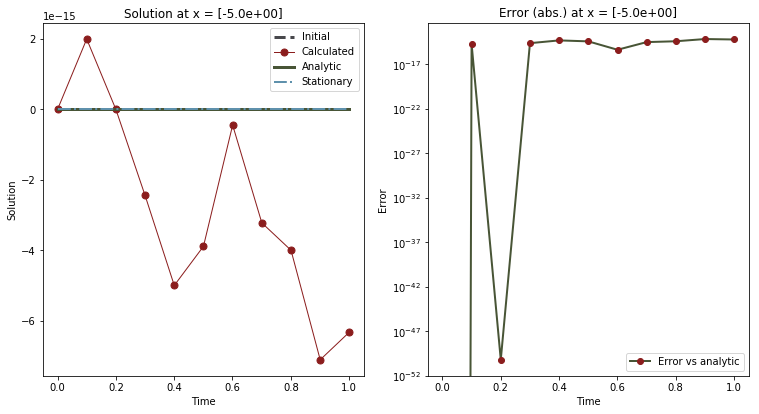

--- Solution at spatial point
X = [ 5.0e+00]


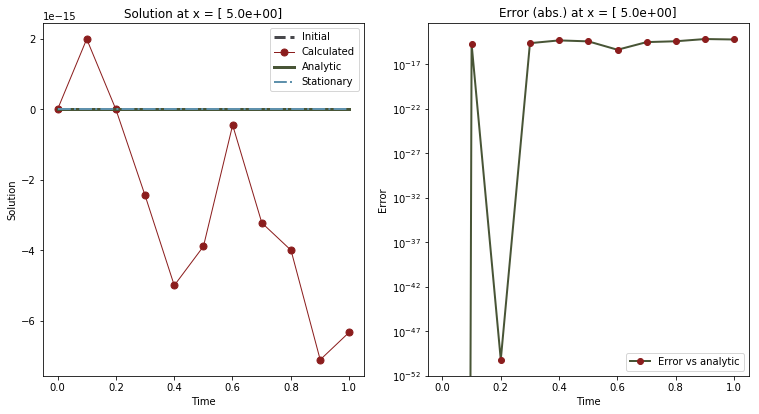

In [5]:
opts = { 'is_log': False, 'is_abs': False, 'is_err_abs': True, 'with_err_stat': False }
SL.plot_t(x_min, opts)
SL.plot_t(x_max, opts)

<div class="head2">
    <div class="head2__name">
        Solution in the inner points
    </div>
</div>

--- Solution at spatial point
X = [-1.5e+00]


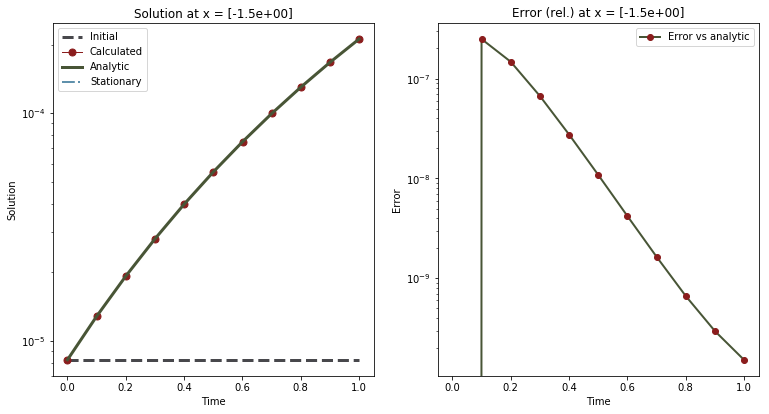

--- Solution at spatial point
X = [ 3.1e-16]


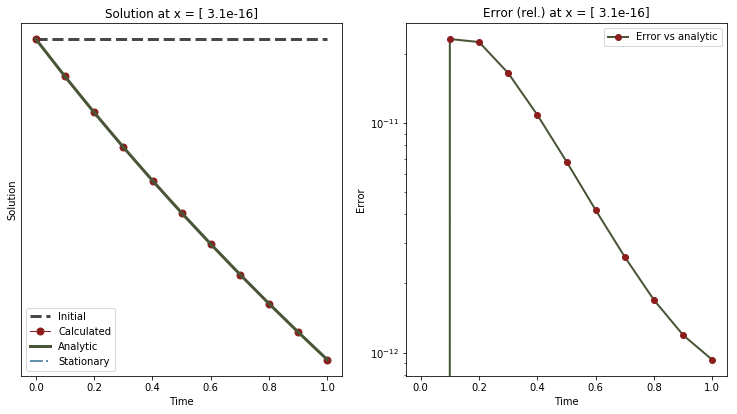

--- Solution at spatial point
X = [ 1.5e+00]


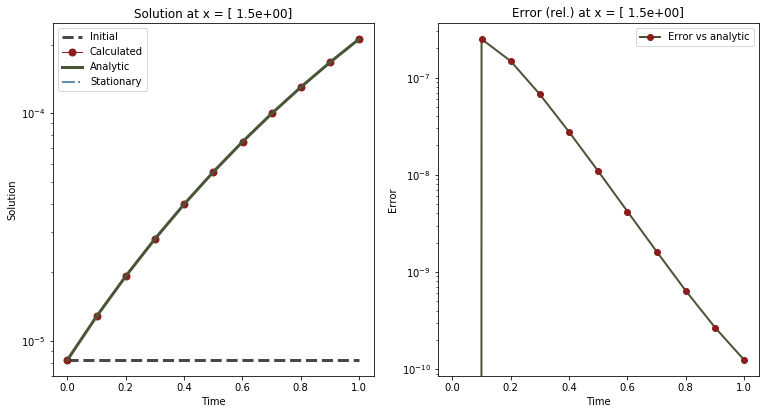

In [6]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': False }
SL.plot_t(-1.5, opts)
SL.plot_t(+0.0, opts)
SL.plot_t(+1.5, opts)

<div class="head2">
    <div class="head2__name">
        Solution for different time moments
    </div>
</div>

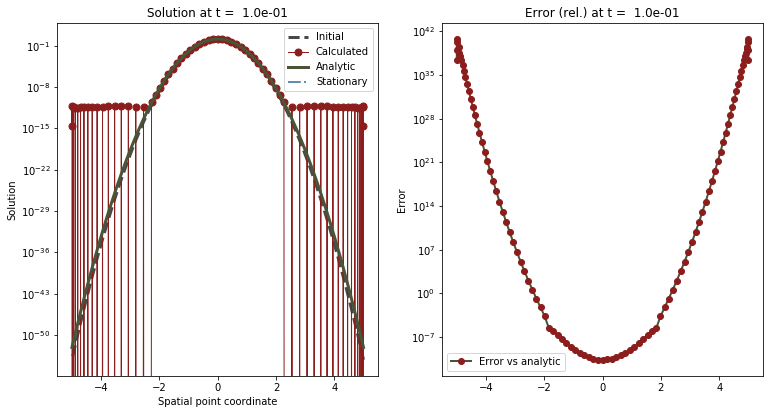

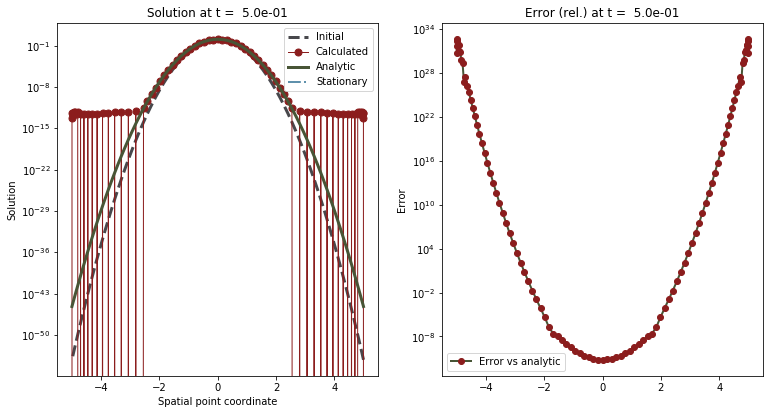

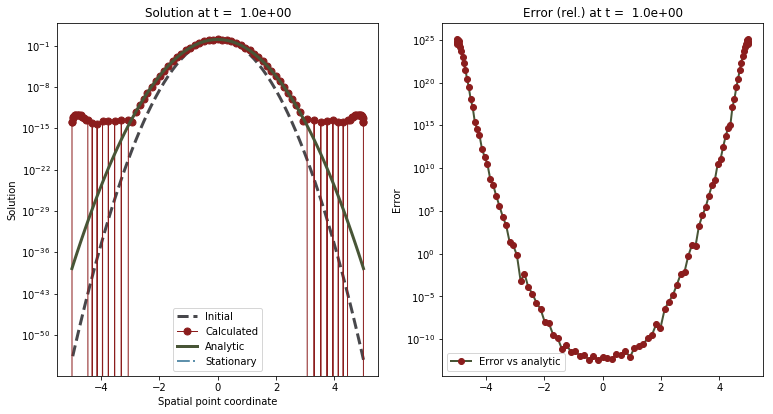

In [7]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': False }
SL.plot_x(+0.1, opts)
SL.plot_x(+0.5, opts)
SL.plot_x(None, opts)

<div class="head1">
    <div class="head1__name">
        Results for multiple computations
    </div>
    <div class="head1__note">
        We use results that already saved to file (see computations code at the end of this file).
    </div>
</div>

In [2]:
SLC = SolversCheck(data_path)
SLC.load()

name1 = 'Solver (ord=1)'
name2 = 'Solver (ord=2)'

M = SLC.res[name2]['M']
N = SLC.res[name2]['N']

m = M[-1]
n = N[-1]

<div class="head2">
    <div class="head2__name">
        Dependence on the number of time points
    </div>
    <div class="head2__note">
        We present results for NP-solver of the 2th order.
    </div>
</div>

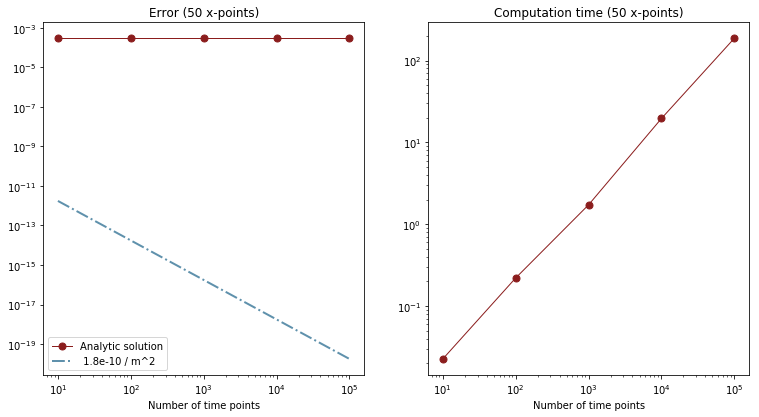

In [3]:
SLC.plot(name2, n=n, is_stat=False, is_xpoi=False, lims={ 'all': [0, None] })

<div class="head2">
    <div class="head2__name">
        Dependence on the number of spatial points
    </div>
    <div class="head2__note">
        We present results for NP-solver of the 2th order.
    </div>
</div>

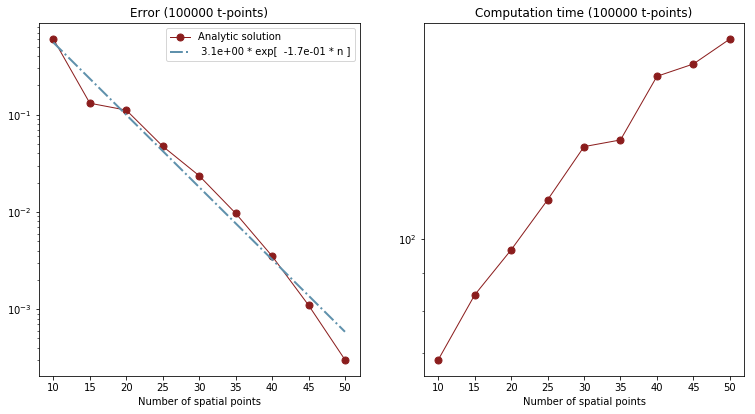

In [4]:
SLC.plot(name2, m=m, is_stat=False, is_xpoi=False, lims={ 'all': [0, None] })

<div class="head2">
    <div class="head2__name">
        Dependence on the solver order
    </div>
    <div class="head2__note">
        We present results (dependencies on the number of time and spatial points) for NP-solvers of various orders.
    </div>
</div>

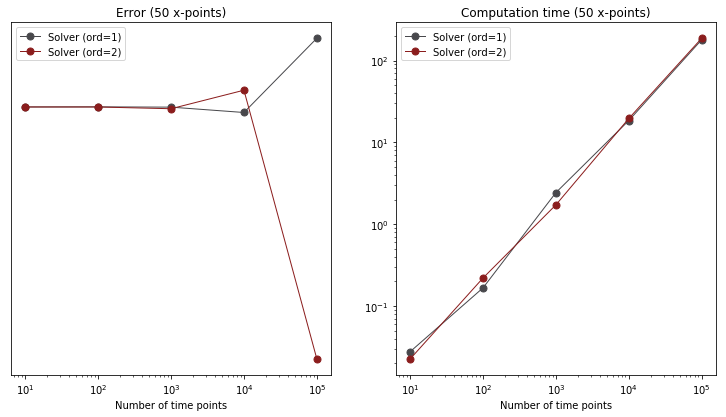

In [8]:
SLC.plot_all(n=n, is_stat=False, is_xpoi=False)

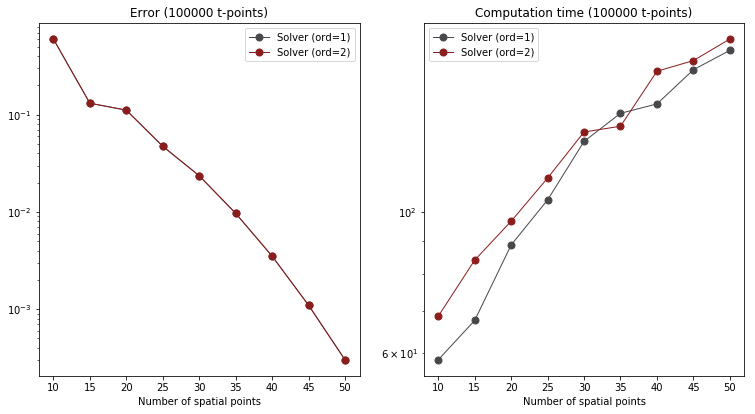

In [6]:
SLC.plot_all(m=m, is_stat=False, is_xpoi=False)

<div class="head1">
    <div class="head1__name">
        Explicit (simple) solvers
    </div>
    <div class="head1__note">
        Only for example and tests.
    </div>
</div>

In [8]:
import time
import numpy as np
import scipy.sparse as sp
from scipy.integrate import solve_ivp
from scipy.linalg import expm as expm
import matplotlib.pyplot as plt

from intertrain import Intertrain

In [9]:
d = 1
m = t_poi
n = x_poi
l = (x_max - x_min) / (x_poi - 1)
h = (t_max - t_min) / (t_poi - 1)
T = np.linspace(t_min, t_max, t_poi)

J = np.eye(n); J[0, 0] = 0.; J[-1, -1] = 0. 

In [10]:
def show_x(X, r_calc, _time):
    X = X.reshape(1, -1)
    r_init = func_r0(X)
    r_real = func_rt(X, t_max)
    r_stat = func_rs(X)
    e = np.linalg.norm(r_real - r_calc) / np.linalg.norm(r_real)

    print('Number of spatial points : %8d'%x_poi)
    print('Number of time points    : %8d'%t_poi)
    print('Error (relative norm)    : %-12.2e'%e)
    print('Total time (sec)         : %-12.2e'%_time)
    print()
    
    plt.plot(
        X.reshape(-1), r_init, '--', label='Initial',
        linewidth=3, color='tab:blue'
    )
    plt.plot(
        X.reshape(-1), r_calc, label='Calculated',
        linewidth=1, color='tab:green', marker='o', markersize=7,
        markerfacecolor='lightgreen', markeredgecolor='g'
    )
    plt.plot(
        X.reshape(-1), r_real, label='Analytic',
        linewidth=3, color='black'
    )
    plt.plot(
        X.reshape(-1), r_stat, '--', label='Stationary',
        linewidth=2, color='magenta'
    )
    
    plt.title('Solution at the final time step')
    plt.xlabel('x')
    plt.ylabel('r')
    plt.legend(loc='best')
    plt.show()

<div class="head2">
    <div class="head2__name">
        Uniform spatial grid and the forward Euler scheme
    </div>
</div>

We can solve equation on the uniform spatial grid for the time $t > 0$ using standard forward Euler scheme
$$
    r_{k+1} = r_{k} + h D r_{k},
    \quad
    k = 0, 1, \ldots, m-1,
$$
where
$$
    D = \frac{D_{coef}}{l^2} tridiag \left( 1, -2, 1 \right).
$$

Number of spatial points :      101
Number of time points    :     1000
Error (relative norm)    : 2.15e-03    
Total time (sec)         : 1.13e-02    



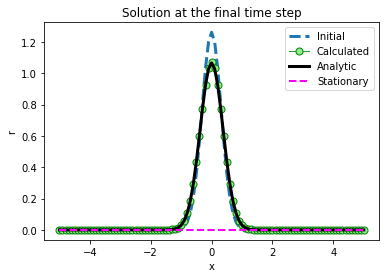

In [11]:
_time = time.time()

X = np.linspace(x_min, x_max, x_poi).reshape(1, -1)

D = sp.spdiags([
        [+1.] * x_poi,
        [-2.] * x_poi,
        [+1.] * x_poi
    ], [-1, 0, 1], x_poi, x_poi
).tocsr().toarray()
D = D * D_coef / l / l

Z = h * D

r = func_r0(X)
for t in T[1:]:
    r = r + Z @ r

show_x(X, r, time.time() - _time)

<div class="head2">
    <div class="head2__name">
        Uniform spatial grid and the backward Euler scheme
    </div>
</div>

We can solve equation on the uniform spatial grid for the time $t > 0$ using standard backward Euler scheme
$$
    A r_{k+1} = r_{k},
    \quad
    k = 0, 1, \ldots, m-1,
$$
where
$$
    A = tridiag \left( -F, 1+2F, -F \right),
    \quad
    F = \frac{h \cdot D_{coef}}{l^2}.
$$

Number of spatial points :      101
Number of time points    :     1000
Error (relative norm)    : 2.20e-03    
Total time (sec)         : 1.11e-01    



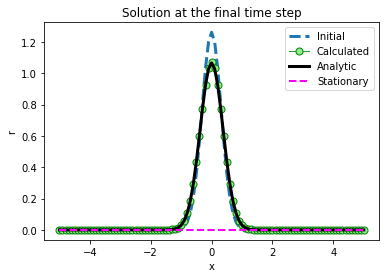

In [12]:
_time = time.time()

X = np.linspace(x_min, x_max, x_poi).reshape(1, -1)

F = h * D_coef / l / l
D = sp.spdiags([
        [-1. * F] * x_poi,
        [+2. * F + 1.] * x_poi,
        [-1. * F] * x_poi
    ], [-1, 0, 1], x_poi, x_poi
).tocsr().toarray()
  
Z = D

r = func_r0(X)
for t in T[1:]:
    r = np.linalg.solve(Z, r)

show_x(X, r, time.time() - _time)

<div class="head2">
    <div class="head2__name">
        Uniform spatial grid and the matrix exponential
    </div>
</div>

We can solve equation on the uniform spatial grid for the time $t > 0$ using matrix exponential and the 2th order finite difference matrix
$$
    u_{t} = e^{t \cdot D_{coef} \cdot D} u_{0},
$$
where $u_{0}(x)$ is the known initial condition.

Number of spatial points :      101
Number of time points    :     1000
Error (relative norm)    : 2.18e-03    
Total time (sec)         : 6.21e-03    



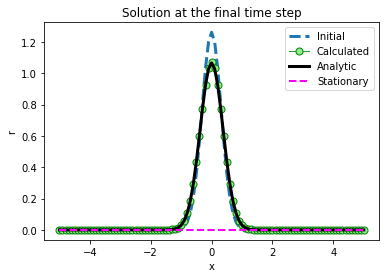

In [13]:
_time = time.time()

X = np.linspace(x_min, x_max, x_poi).reshape(1, -1)

D = sp.spdiags([
        [+1.] * x_poi,
        [-2.] * x_poi,
        [+1.] * x_poi
    ], [-1, 0, 1], x_poi, x_poi
).tocsr().toarray()
D = D * D_coef / l / l
  
Z = expm((t_max - t_min) * D)

r = func_r0(X)
r = Z@r

show_x(X, r, time.time() - _time)

<div class="head2">
    <div class="head2__name">
        Chebyshev spatial grid and the matrix exponential
    </div>
</div>

We can solve equation on the Chebyshev spatial grid for the time $t > 0$ using matrix exponential and the 2th order Chebyshev differentiation matrix
$$
    u_{t} = e^{t \cdot D_{coef} \cdot D} u_{0},
$$
where $u_{0}(x)$ is the known initial condition.

Number of spatial points :      101
Number of time points    :     1000
Error (relative norm)    : 5.90e-13    
Total time (sec)         : 8.19e-03    



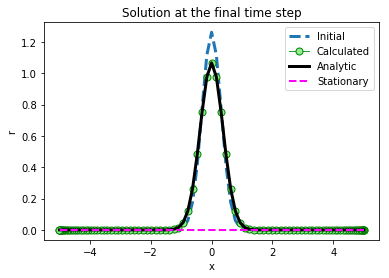

In [14]:
_time = time.time()

IT = Intertrain(n=[x_poi], l=[[x_min, x_max]])

X = IT.grid()

D = D_coef * IT.dif2()

J = np.eye(n); J[0, 0] = 0.; J[-1, -1] = 0.    
Z = expm((t_max - t_min) * J @ D)

r = func_r0(X)
r = Z@r

show_x(X, r, time.time() - _time)

<div class="head1">
    <div class="head1__name">
        Multiple computations
    </div>
    <div class="head1__note">
        We compute dependencies of solution accuracy and calculation time on the number of time and spacial points and solver type. Results are saved to file and may be reused later for visualization.  
    </div>
</div>

In [15]:
if False: # Protection of already saved data
    SLC = SolversCheck(data_path)
    SLC.set_grid_t(t_min, t_max)
    SLC.set_grid_x(x_min, x_max)
    SLC.set_funcs(func_f0, func_f1, func_r0, func_rt, func_rs)
    SLC.set_coefs(D_coef)

    M = [10, 100, 1000, 10000, 100000]
    N = list(np.arange(10, 51, 5, dtype=int))
    SLC.add(name='Solver (ord=1)', d=1, eps=1.E-6, ord=1, with_tt=False, M=M, N=N)

    M = [10, 100, 1000, 10000, 100000]
    N = list(np.arange(10, 51, 5, dtype=int))
    SLC.add(name='Solver (ord=2)', d=1, eps=1.E-6, ord=2, with_tt=False, M=M, N=N)

    SLC.calc()
    SLC.save()

----- Calc for solver | "Solver (ord=1)"
----- Computation     | m = 10       | n = 10      


Solve: 100%|█| 9/9 [00:00<00:00, 611.53step/s, | At T=1.0e+00 : e=6.0e-01 es=4.1e-02]


----- Computation     | m = 10       | n = 15      


Solve: 100%|█| 9/9 [00:00<00:00, 692.84step/s, | At T=1.0e+00 : e=1.3e-01 es=1.2e+00]


----- Computation     | m = 10       | n = 20      


Solve: 100%|█| 9/9 [00:00<00:00, 175.42step/s, | At T=1.0e+00 : e=1.1e-01 es=7.3e-01]


----- Computation     | m = 10       | n = 25      


Solve: 100%|█| 9/9 [00:00<00:00, 617.24step/s, | At T=1.0e+00 : e=4.7e-02 es=1.2e+00]


----- Computation     | m = 10       | n = 30      


Solve: 100%|█| 9/9 [00:00<00:00, 527.77step/s, | At T=1.0e+00 : e=2.4e-02 es=1.2e+00]


----- Computation     | m = 10       | n = 35      


Solve: 100%|█| 9/9 [00:00<00:00, 370.03step/s, | At T=1.0e+00 : e=9.7e-03 es=1.3e+00]


----- Computation     | m = 10       | n = 40      


Solve: 100%|█| 9/9 [00:00<00:00, 388.47step/s, | At T=1.0e+00 : e=3.5e-03 es=1.4e+00]


----- Computation     | m = 10       | n = 45      


Solve: 100%|█| 9/9 [00:00<00:00, 266.98step/s, | At T=1.0e+00 : e=1.1e-03 es=1.5e+00]


----- Computation     | m = 10       | n = 50      


Solve: 100%|█| 9/9 [00:00<00:00, 324.45step/s, | At T=1.0e+00 : e=3.0e-04 es=1.5e+00]


----- Computation     | m = 100      | n = 10      


Solve: 100%|█| 99/99 [00:00<00:00, 1657.79step/s, | At T=1.0e+00 : e=6.0e-01 es=4.1e-02]


----- Computation     | m = 100      | n = 15      


Solve: 100%|█| 99/99 [00:00<00:00, 1330.16step/s, | At T=1.0e+00 : e=1.3e-01 es=1.2e+00]


----- Computation     | m = 100      | n = 20      


Solve: 100%|█| 99/99 [00:00<00:00, 1084.52step/s, | At T=1.0e+00 : e=1.1e-01 es=7.3e-01]


----- Computation     | m = 100      | n = 25      


Solve: 100%|█| 99/99 [00:00<00:00, 977.72step/s, | At T=1.0e+00 : e=4.7e-02 es=1.2e+00]


----- Computation     | m = 100      | n = 30      


Solve: 100%|█| 99/99 [00:00<00:00, 842.85step/s, | At T=1.0e+00 : e=2.4e-02 es=1.2e+00]


----- Computation     | m = 100      | n = 35      


Solve: 100%|█| 99/99 [00:00<00:00, 658.15step/s, | At T=1.0e+00 : e=9.7e-03 es=1.3e+00]


----- Computation     | m = 100      | n = 40      


Solve: 100%|█| 99/99 [00:00<00:00, 676.04step/s, | At T=1.0e+00 : e=3.5e-03 es=1.4e+00]


----- Computation     | m = 100      | n = 45      


Solve: 100%|█| 99/99 [00:00<00:00, 605.16step/s, | At T=1.0e+00 : e=1.1e-03 es=1.5e+00]


----- Computation     | m = 100      | n = 50      


Solve: 100%|█| 99/99 [00:00<00:00, 589.27step/s, | At T=1.0e+00 : e=3.0e-04 es=1.5e+00]


----- Computation     | m = 1000     | n = 10      


Solve: 100%|█| 999/999 [00:00<00:00, 1857.11step/s, | At T=1.0e+00 : e=6.0e-01 es=4.1e-02]


----- Computation     | m = 1000     | n = 15      


Solve: 100%|█| 999/999 [00:00<00:00, 1480.20step/s, | At T=1.0e+00 : e=1.3e-01 es=1.2e+00]


----- Computation     | m = 1000     | n = 20      


Solve: 100%|█| 999/999 [00:00<00:00, 1182.55step/s, | At T=1.0e+00 : e=1.1e-01 es=7.3e-01]


----- Computation     | m = 1000     | n = 25      


Solve: 100%|█| 999/999 [00:00<00:00, 1007.54step/s, | At T=1.0e+00 : e=4.7e-02 es=1.2e+00]


----- Computation     | m = 1000     | n = 30      


Solve: 100%|█| 999/999 [00:01<00:00, 907.73step/s, | At T=1.0e+00 : e=2.4e-02 es=1.2e+00]


----- Computation     | m = 1000     | n = 35      


Solve: 100%|█| 999/999 [00:01<00:00, 778.46step/s, | At T=1.0e+00 : e=9.7e-03 es=1.3e+00]


----- Computation     | m = 1000     | n = 40      


Solve: 100%|█| 999/999 [00:01<00:00, 615.99step/s, | At T=1.0e+00 : e=3.5e-03 es=1.4e+00]


----- Computation     | m = 1000     | n = 45      


Solve: 100%|█| 999/999 [00:01<00:00, 611.02step/s, | At T=1.0e+00 : e=1.1e-03 es=1.5e+00]


----- Computation     | m = 1000     | n = 50      


Solve: 100%|█| 999/999 [00:02<00:00, 405.60step/s, | At T=1.0e+00 : e=3.0e-04 es=1.5e+00]


----- Computation     | m = 10000    | n = 10      


Solve: 100%|█| 9999/9999 [00:06<00:00, 1564.56step/s, | At T=1.0e+00 : e=6.0e-01 es=4.1e-02]


----- Computation     | m = 10000    | n = 15      


Solve: 100%|█| 9999/9999 [00:07<00:00, 1375.99step/s, | At T=1.0e+00 : e=1.3e-01 es=1.2e+00]


----- Computation     | m = 10000    | n = 20      


Solve: 100%|█| 9999/9999 [00:09<00:00, 1100.79step/s, | At T=1.0e+00 : e=1.1e-01 es=7.3e-01]


----- Computation     | m = 10000    | n = 25      


Solve: 100%|█| 9999/9999 [00:12<00:00, 797.64step/s, | At T=1.0e+00 : e=4.7e-02 es=1.2e+00]


----- Computation     | m = 10000    | n = 30      


Solve: 100%|█| 9999/9999 [00:13<00:00, 730.25step/s, | At T=1.0e+00 : e=2.4e-02 es=1.2e+00]


----- Computation     | m = 10000    | n = 35      


Solve: 100%|█| 9999/9999 [00:14<00:00, 690.70step/s, | At T=1.0e+00 : e=9.7e-03 es=1.3e+00]


----- Computation     | m = 10000    | n = 40      


Solve: 100%|█| 9999/9999 [00:16<00:00, 613.67step/s, | At T=1.0e+00 : e=3.5e-03 es=1.4e+00]


----- Computation     | m = 10000    | n = 45      


Solve: 100%|█| 9999/9999 [00:17<00:00, 578.46step/s, | At T=1.0e+00 : e=1.1e-03 es=1.5e+00]


----- Computation     | m = 10000    | n = 50      


Solve: 100%|█| 9999/9999 [00:18<00:00, 534.98step/s, | At T=1.0e+00 : e=3.0e-04 es=1.5e+00]


----- Computation     | m = 100000   | n = 10      


Solve: 100%|█| 99999/99999 [00:59<00:00, 1684.34step/s, | At T=1.0e+00 : e=6.0e-01 es=4.1e-02]


----- Computation     | m = 100000   | n = 15      


Solve: 100%|█| 99999/99999 [01:08<00:00, 1463.43step/s, | At T=1.0e+00 : e=1.3e-01 es=1.2e+00]


----- Computation     | m = 100000   | n = 20      


Solve: 100%|█| 99999/99999 [01:29<00:00, 1113.29step/s, | At T=1.0e+00 : e=1.1e-01 es=7.3e-01]


----- Computation     | m = 100000   | n = 25      


Solve: 100%|█| 99999/99999 [01:45<00:00, 945.49step/s, | At T=1.0e+00 : e=4.7e-02 es=1.2e+00]


----- Computation     | m = 100000   | n = 30      


Solve: 100%|█| 99999/99999 [02:10<00:00, 764.50step/s, | At T=1.0e+00 : e=2.4e-02 es=1.2e+00]


----- Computation     | m = 100000   | n = 35      


Solve: 100%|█| 99999/99999 [02:24<00:00, 691.18step/s, | At T=1.0e+00 : e=9.7e-03 es=1.3e+00]


----- Computation     | m = 100000   | n = 40      


Solve: 100%|█| 99999/99999 [02:29<00:00, 668.28step/s, | At T=1.0e+00 : e=3.5e-03 es=1.4e+00]


----- Computation     | m = 100000   | n = 45      


Solve: 100%|█| 99999/99999 [02:49<00:00, 590.68step/s, | At T=1.0e+00 : e=1.1e-03 es=1.5e+00]


----- Computation     | m = 100000   | n = 50      


Solve: 100%|█| 99999/99999 [03:01<00:00, 550.85step/s, | At T=1.0e+00 : e=3.0e-04 es=1.5e+00]


----- Done            | Time : 1.27e+03 sec
----- Calc for solver | "Solver (ord=2)"
----- Computation     | m = 10       | n = 10      


Solve: 100%|█| 9/9 [00:00<00:00, 755.35step/s, | At T=1.0e+00 : e=6.0e-01 es=4.1e-02]


----- Computation     | m = 10       | n = 15      


Solve: 100%|█| 9/9 [00:00<00:00, 657.61step/s, | At T=1.0e+00 : e=1.3e-01 es=1.2e+00]


----- Computation     | m = 10       | n = 20      


Solve: 100%|█| 9/9 [00:00<00:00, 646.87step/s, | At T=1.0e+00 : e=1.1e-01 es=7.3e-01]


----- Computation     | m = 10       | n = 25      


Solve: 100%|█| 9/9 [00:00<00:00, 507.10step/s, | At T=1.0e+00 : e=4.7e-02 es=1.2e+00]


----- Computation     | m = 10       | n = 30      


Solve: 100%|█| 9/9 [00:00<00:00, 553.40step/s, | At T=1.0e+00 : e=2.4e-02 es=1.2e+00]


----- Computation     | m = 10       | n = 35      


Solve: 100%|█| 9/9 [00:00<00:00, 354.65step/s, | At T=1.0e+00 : e=9.7e-03 es=1.3e+00]


----- Computation     | m = 10       | n = 40      


Solve: 100%|█| 9/9 [00:00<00:00, 346.71step/s, | At T=1.0e+00 : e=3.5e-03 es=1.4e+00]


----- Computation     | m = 10       | n = 45      


Solve: 100%|█| 9/9 [00:00<00:00, 393.15step/s, | At T=1.0e+00 : e=1.1e-03 es=1.5e+00]


----- Computation     | m = 10       | n = 50      


Solve: 100%|█| 9/9 [00:00<00:00, 422.43step/s, | At T=1.0e+00 : e=3.0e-04 es=1.5e+00]


----- Computation     | m = 100      | n = 10      


Solve: 100%|█| 99/99 [00:00<00:00, 1521.11step/s, | At T=1.0e+00 : e=6.0e-01 es=4.1e-02]


----- Computation     | m = 100      | n = 15      


Solve: 100%|█| 99/99 [00:00<00:00, 1253.01step/s, | At T=1.0e+00 : e=1.3e-01 es=1.2e+00]


----- Computation     | m = 100      | n = 20      


Solve: 100%|█| 99/99 [00:00<00:00, 1106.18step/s, | At T=1.0e+00 : e=1.1e-01 es=7.3e-01]


----- Computation     | m = 100      | n = 25      


Solve: 100%|█| 99/99 [00:00<00:00, 401.93step/s, | At T=1.0e+00 : e=4.7e-02 es=1.2e+00]


----- Computation     | m = 100      | n = 30      


Solve: 100%|█| 99/99 [00:00<00:00, 683.26step/s, | At T=1.0e+00 : e=2.4e-02 es=1.2e+00]


----- Computation     | m = 100      | n = 35      


Solve: 100%|█| 99/99 [00:00<00:00, 618.63step/s, | At T=1.0e+00 : e=9.7e-03 es=1.3e+00]


----- Computation     | m = 100      | n = 40      


Solve: 100%|█| 99/99 [00:00<00:00, 452.64step/s, | At T=1.0e+00 : e=3.5e-03 es=1.4e+00]


----- Computation     | m = 100      | n = 45      


Solve: 100%|█| 99/99 [00:00<00:00, 370.06step/s, | At T=1.0e+00 : e=1.1e-03 es=1.5e+00]


----- Computation     | m = 100      | n = 50      


Solve: 100%|█| 99/99 [00:00<00:00, 444.63step/s, | At T=1.0e+00 : e=3.0e-04 es=1.5e+00]


----- Computation     | m = 1000     | n = 10      


Solve: 100%|█| 999/999 [00:00<00:00, 1497.57step/s, | At T=1.0e+00 : e=6.0e-01 es=4.1e-02]


----- Computation     | m = 1000     | n = 15      


Solve: 100%|█| 999/999 [00:00<00:00, 1218.98step/s, | At T=1.0e+00 : e=1.3e-01 es=1.2e+00]


----- Computation     | m = 1000     | n = 20      


Solve: 100%|█| 999/999 [00:00<00:00, 1071.10step/s, | At T=1.0e+00 : e=1.1e-01 es=7.3e-01]


----- Computation     | m = 1000     | n = 25      


Solve: 100%|█| 999/999 [00:01<00:00, 868.79step/s, | At T=1.0e+00 : e=4.7e-02 es=1.2e+00]


----- Computation     | m = 1000     | n = 30      


Solve: 100%|█| 999/999 [00:01<00:00, 841.16step/s, | At T=1.0e+00 : e=2.4e-02 es=1.2e+00]


----- Computation     | m = 1000     | n = 35      


Solve: 100%|█| 999/999 [00:01<00:00, 738.07step/s, | At T=1.0e+00 : e=9.7e-03 es=1.3e+00]


----- Computation     | m = 1000     | n = 40      


Solve: 100%|█| 999/999 [00:01<00:00, 653.14step/s, | At T=1.0e+00 : e=3.5e-03 es=1.4e+00]


----- Computation     | m = 1000     | n = 45      


Solve: 100%|█| 999/999 [00:01<00:00, 611.46step/s, | At T=1.0e+00 : e=1.1e-03 es=1.5e+00]


----- Computation     | m = 1000     | n = 50      


Solve: 100%|█| 999/999 [00:01<00:00, 573.51step/s, | At T=1.0e+00 : e=3.0e-04 es=1.5e+00]


----- Computation     | m = 10000    | n = 10      


Solve: 100%|█| 9999/9999 [00:06<00:00, 1545.21step/s, | At T=1.0e+00 : e=6.0e-01 es=4.1e-02]


----- Computation     | m = 10000    | n = 15      


Solve: 100%|█| 9999/9999 [00:08<00:00, 1143.50step/s, | At T=1.0e+00 : e=1.3e-01 es=1.2e+00]


----- Computation     | m = 10000    | n = 20      


Solve: 100%|█| 9999/9999 [00:09<00:00, 1065.99step/s, | At T=1.0e+00 : e=1.1e-01 es=7.3e-01]


----- Computation     | m = 10000    | n = 25      


Solve: 100%|█| 9999/9999 [00:11<00:00, 888.99step/s, | At T=1.0e+00 : e=4.7e-02 es=1.2e+00]


----- Computation     | m = 10000    | n = 30      


Solve: 100%|█| 9999/9999 [00:13<00:00, 737.94step/s, | At T=1.0e+00 : e=2.4e-02 es=1.2e+00]


----- Computation     | m = 10000    | n = 35      


Solve: 100%|█| 9999/9999 [00:14<00:00, 689.76step/s, | At T=1.0e+00 : e=9.7e-03 es=1.3e+00]


----- Computation     | m = 10000    | n = 40      


Solve: 100%|█| 9999/9999 [00:20<00:00, 488.52step/s, | At T=1.0e+00 : e=3.5e-03 es=1.4e+00]


----- Computation     | m = 10000    | n = 45      


Solve: 100%|█| 9999/9999 [00:18<00:00, 546.89step/s, | At T=1.0e+00 : e=1.1e-03 es=1.5e+00]


----- Computation     | m = 10000    | n = 50      


Solve: 100%|█| 9999/9999 [00:19<00:00, 504.84step/s, | At T=1.0e+00 : e=3.0e-04 es=1.5e+00]


----- Computation     | m = 100000   | n = 10      


Solve: 100%|█| 99999/99999 [01:09<00:00, 1438.72step/s, | At T=1.0e+00 : e=6.0e-01 es=4.1e-02]


----- Computation     | m = 100000   | n = 15      


Solve: 100%|█| 99999/99999 [01:25<00:00, 1175.47step/s, | At T=1.0e+00 : e=1.3e-01 es=1.2e+00]


----- Computation     | m = 100000   | n = 20      


Solve: 100%|█| 99999/99999 [01:37<00:00, 1021.53step/s, | At T=1.0e+00 : e=1.1e-01 es=7.3e-01]


----- Computation     | m = 100000   | n = 25      


Solve: 100%|█| 99999/99999 [01:54<00:00, 873.87step/s, | At T=1.0e+00 : e=4.7e-02 es=1.2e+00]


----- Computation     | m = 100000   | n = 30      


Solve: 100%|█| 99999/99999 [02:15<00:00, 739.52step/s, | At T=1.0e+00 : e=2.4e-02 es=1.2e+00]


----- Computation     | m = 100000   | n = 35      


Solve: 100%|█| 99999/99999 [02:17<00:00, 725.37step/s, | At T=1.0e+00 : e=9.7e-03 es=1.3e+00]


----- Computation     | m = 100000   | n = 40      


Solve: 100%|█| 99999/99999 [02:48<00:00, 593.71step/s, | At T=1.0e+00 : e=3.5e-03 es=1.4e+00]


----- Computation     | m = 100000   | n = 45      


Solve: 100%|█| 99999/99999 [02:54<00:00, 571.82step/s, | At T=1.0e+00 : e=1.1e-03 es=1.5e+00]


----- Computation     | m = 100000   | n = 50      


Solve: 100%|█| 99999/99999 [03:09<00:00, 528.91step/s, | At T=1.0e+00 : e=3.0e-04 es=1.5e+00]


----- Done            | Time : 1.35e+03 sec


<div class="end"></div>